<a href="https://colab.research.google.com/github/johnrua17/I.B-Lab/blob/main/I_B_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


### Definición y muestreo de la señal

Niveles de cuantización (L): 16
Bits necesarios por muestra: 4


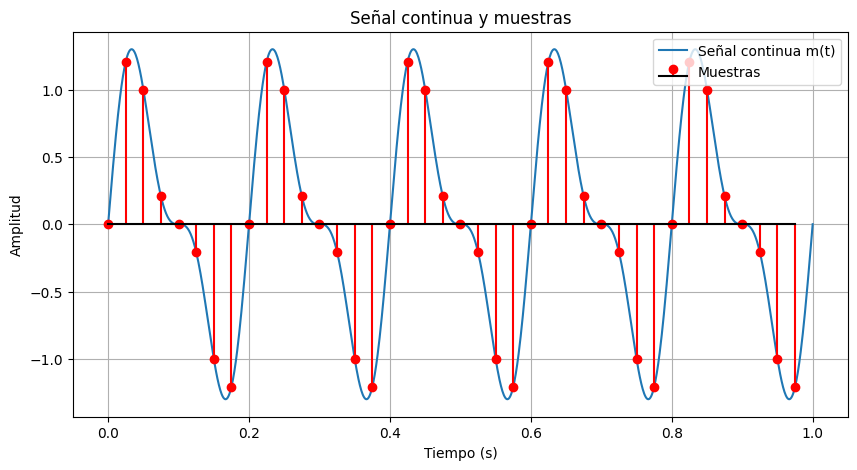

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la señal m(t): suma de sinusoides
def generate_signal(t, f1, f2):
    return np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

# Parámetros de la señal
t_max = 1  # Duración de la señal en segundos
fs_cont = 1000  # Frecuencia de muestreo para señal continua (para graficar)
f1, f2 = 5, 10  # Frecuencias de las sinusoides

# Generación de la señal continua
t = np.linspace(0, t_max, int(t_max * fs_cont)) # Vector de tiempo
m_t = generate_signal(t, f1, f2) # Señal m(t)

# Muestreo según el teorema del muestreo
fs = 40  # Frecuencia de muestreo (fs >= 2 * f_max)
ts = 1 / fs  # Periodo de muestreo
n = np.arange(0, t_max, ts) # Muestras en el tiempo
m_samples = generate_signal(n, f1, f2) # Muestras de la señal

# Definir los niveles de cuantización y calcular los bits necesarios
L = 16  # Número de niveles de cuantización
bits_per_sample = int(np.ceil(np.log2(L)))  # Cálculo de bits

print(f"Niveles de cuantización (L): {L}")
print(f"Bits necesarios por muestra: {bits_per_sample}")

# Gráfica de la señal original y muestras
plt.figure(figsize=(10, 5))
plt.plot(t, m_t, label="Señal continua m(t)")
plt.stem(n, m_samples, linefmt="r", markerfmt="ro", basefmt="k", label="Muestras")
plt.title("Señal continua y muestras")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()
plt.show()

### Cuantización uniforme

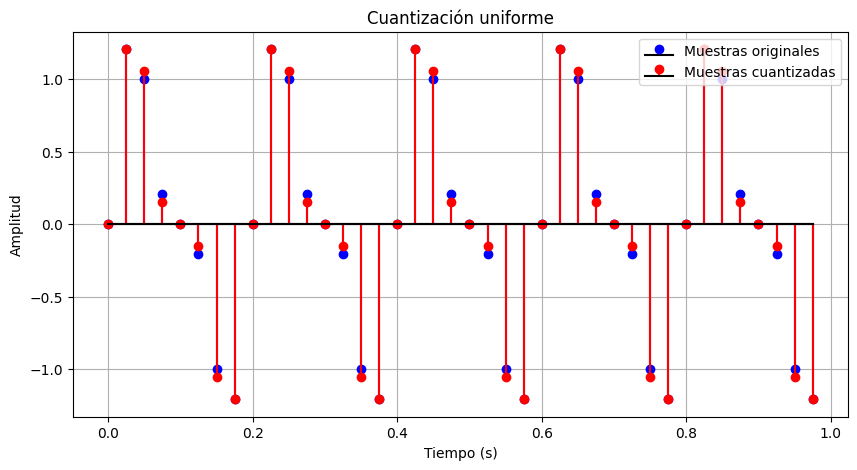

In [9]:
# Determinar el rango dinámico de la señal
L = 16  # Número de niveles de cuantización
min_val, max_val = min(m_samples), max(m_samples) # Mínimo y máximo de las muestras
step_size = (max_val - min_val) / L # Tamaño del paso de cuantización

# Cuantización de las muestras
quantized_samples = np.round((m_samples - min_val) / step_size) * step_size + min_val # Cuantización

# Gráfica de la señal cuantizada
plt.figure(figsize=(10, 5))
plt.stem(n, m_samples, linefmt="b", markerfmt="bo", basefmt="k", label="Muestras originales")
plt.stem(n, quantized_samples, linefmt="r", markerfmt="ro", basefmt="k", label="Muestras cuantizadas")
plt.title("Cuantización uniforme")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()
plt.show()

### Codificación

In [10]:
# Convertir los niveles cuantizados en palabras binarias
bits_per_sample = int(np.ceil(np.log2(L)))  # Número de bits por muestra
binary_code = [
    np.binary_repr(max(0, min(int(np.round((x - min_val) / step_size)), L - 1)), bits_per_sample)
    for x in quantized_samples
]

# Mostrar los códigos binarios generados
print("Códigos binarios de las muestras cuantizadas:")
for i, code in enumerate(binary_code):
    print(f"Muestra {i}: {quantized_samples[i]:.2f} -> {code}")

Códigos binarios de las muestras cuantizadas:
Muestra 0: -0.00 -> 1000
Muestra 1: 1.21 -> 1111
Muestra 2: 1.06 -> 1111
Muestra 3: 0.15 -> 1001
Muestra 4: -0.00 -> 1000
Muestra 5: -0.15 -> 0111
Muestra 6: -1.06 -> 0001
Muestra 7: -1.21 -> 0000
Muestra 8: -0.00 -> 1000
Muestra 9: 1.21 -> 1111
Muestra 10: 1.06 -> 1111
Muestra 11: 0.15 -> 1001
Muestra 12: -0.00 -> 1000
Muestra 13: -0.15 -> 0111
Muestra 14: -1.06 -> 0001
Muestra 15: -1.21 -> 0000
Muestra 16: -0.00 -> 1000
Muestra 17: 1.21 -> 1111
Muestra 18: 1.06 -> 1111
Muestra 19: 0.15 -> 1001
Muestra 20: -0.00 -> 1000
Muestra 21: -0.15 -> 0111
Muestra 22: -1.06 -> 0001
Muestra 23: -1.21 -> 0000
Muestra 24: -0.00 -> 1000
Muestra 25: 1.21 -> 1111
Muestra 26: 1.06 -> 1111
Muestra 27: 0.15 -> 1001
Muestra 28: -0.00 -> 1000
Muestra 29: -0.15 -> 0111
Muestra 30: -1.06 -> 0001
Muestra 31: -1.21 -> 0000
Muestra 32: -0.00 -> 1000
Muestra 33: 1.21 -> 1111
Muestra 34: 1.06 -> 1111
Muestra 35: 0.15 -> 1001
Muestra 36: -0.00 -> 1000
Muestra 37: -0.15

d. Generación de formatos de señalización, graficando las formas de onda de pulsos
correspondientes a cualquiera de los siguientes formatos de señalización:

<ipython-input-28-a60a899130d3>:35: DeprecationWarning: Insufficient bit width provided. This behavior will raise an error in the future.
  binary_codes = [np.binary_repr(code, width=bits) for code in binary_coding]


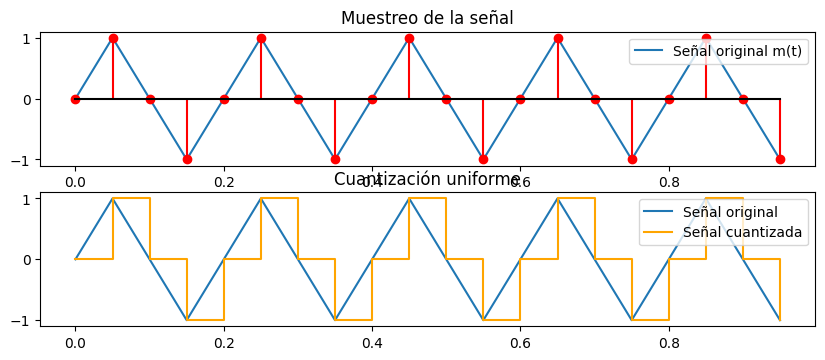

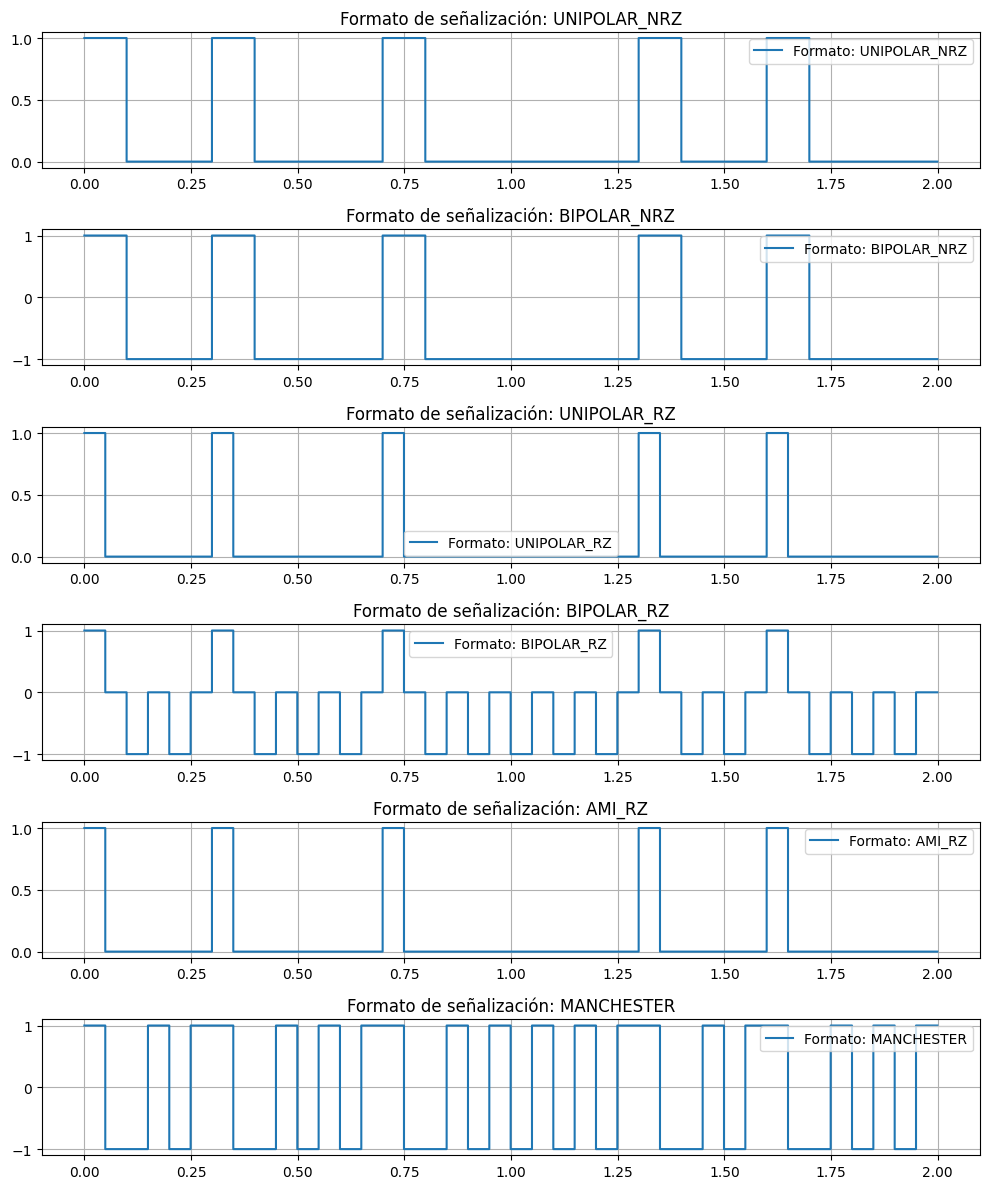

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
fm = 5  # Frecuencia máxima de la señal (Hz)
fs = 2 * fm * 2  # Frecuencia de muestreo (Cumpliendo Teorema de Nyquist)
t = np.arange(0, 1, 1/fs)  # Tiempo total 1s, muestreado cada 1/fs
bits = 3  # Número de bits para cuantización uniforme
niveles = 2 ** bits  # Número de niveles de cuantización

# 1. Generación de señal m(t) (sinusoide o suma de sinusoides)
m_t = np.sin(2 * np.pi * fm * t) + 0.5 * np.sin(2 * np.pi * 2 * fm * t)

# 2. Muestreo
plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 1)
plt.plot(t, m_t, label='Señal original m(t)')
plt.stem(t, m_t, linefmt='r-', markerfmt='ro', basefmt='k')
plt.title('Muestreo de la señal')
plt.legend()

# 3. Cuantización uniforme
min_val, max_val = np.min(m_t), np.max(m_t)
delta = (max_val - min_val) / niveles  # Paso de cuantización
quantized_signal = np.round((m_t - min_val) / delta) * delta + min_val  # Aproximación uniforme

plt.subplot(4, 1, 2)
plt.plot(t, m_t, label='Señal original')
plt.step(t, quantized_signal, where='post', label='Señal cuantizada', color='orange')
plt.title('Cuantización uniforme')
plt.legend()

# 4. Codificación
binary_coding = ((quantized_signal - min_val) / delta).astype(int)
binary_codes = [np.binary_repr(code, width=bits) for code in binary_coding]

# print("Codificación Binaria de los Primeros 10 Valores:")
# for i in range(10):
#     print(f"t={t[i]:.2f}s -> Nivel={quantized_signal[i]:.2f} -> Binario={binary_codes[i]}")

# 5. Formatos de señalización
def generate_signal(binary_codes, format_type='unipolar_nrz', bit_duration=0.1, fs=1000):
    total_duration = len(binary_codes) * bit_duration
    t_signal = np.arange(0, total_duration, 1/fs)  # Tiempo continuo de la señal
    signal = np.zeros_like(t_signal)
    samples_per_bit = int(bit_duration * fs)  # Muestras por bit

    # Índice de la señal
    current_idx = 0

    for code in binary_codes:
        for bit in code:
            if format_type == 'unipolar_nrz':
                signal[current_idx:current_idx+samples_per_bit] = int(bit)
            elif format_type == 'bipolar_nrz':
                signal[current_idx:current_idx+samples_per_bit] = 1 if bit == '1' else -1
            elif format_type == 'unipolar_rz':
                half_samples = samples_per_bit // 2
                signal[current_idx:current_idx+half_samples] = int(bit)
            elif format_type == 'bipolar_rz':
                half_samples = samples_per_bit // 2
                signal[current_idx:current_idx+half_samples] = 1 if bit == '1' else -1
            elif format_type == 'ami_rz':
                half_samples = samples_per_bit // 2
                if bit == '1':
                    signal[current_idx:current_idx+half_samples] = 1 if current_idx % 2 == 0 else -1
            elif format_type == 'manchester':
                half_samples = samples_per_bit // 2
                if bit == '1':
                    signal[current_idx:current_idx+half_samples] = 1
                    signal[current_idx+half_samples:current_idx+samples_per_bit] = -1
                else:
                    signal[current_idx:current_idx+half_samples] = -1
                    signal[current_idx+half_samples:current_idx+samples_per_bit] = 1
            current_idx += samples_per_bit

    return t_signal, signal

# Graficar Formatos de señalización
formats = ['unipolar_nrz', 'bipolar_nrz', 'unipolar_rz', 'bipolar_rz', 'ami_rz', 'manchester']
plt.figure(figsize=(10, 12))
for i, fmt in enumerate(formats):
    t_signal, signal = generate_signal(binary_codes, format_type=fmt)
    plt.subplot(6, 1, i + 1)
    plt.plot(t_signal, signal, drawstyle='steps-pre', label=f"Formato: {fmt.upper()}")
    plt.title(f"Formato de señalización: {fmt.upper()}")
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


# --- Parte e: Reconstrucción de la señal con interpolación sinc ---2. Bipolar NRZ

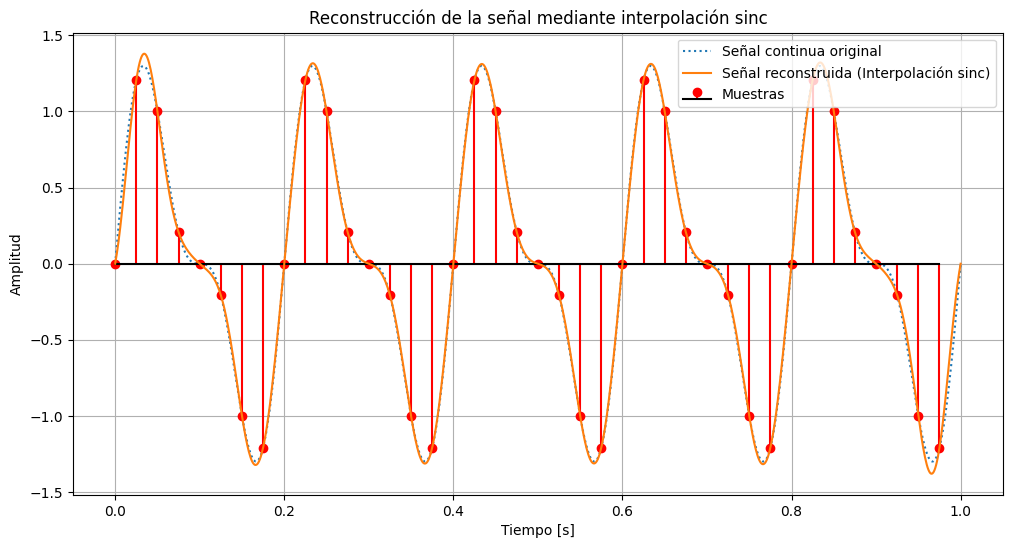

In [23]:
# --- Parte e: Reconstrucción de la señal con interpolación sinc ---
import numpy as np
import matplotlib.pyplot as plt

# Función de interpolación sinc
def sinc_interpolation(t, n, samples, ts):
    reconstructed = np.zeros_like(t)
    for i in range(len(n)):
        reconstructed += samples[i] * np.sinc((t - n[i]) / ts)
    return reconstructed

# Parámetros de la señal original
t_max = 1  # Duración en segundos
fs_cont = 1000  # Frecuencia para señal continua
fs = 40  # Frecuencia de muestreo
ts = 1 / fs  # Periodo de muestreo

# Generación de la señal original y muestreada
def generate_signal(t, f1, f2):
    return np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

f1, f2 = 5, 10  # Frecuencias
t_original = np.linspace(0, t_max, int(t_max * fs_cont))  # Señal continua
m_t = generate_signal(t_original, f1, f2)

n = np.arange(0, t_max, ts)  # Instantes de muestreo
m_samples = generate_signal(n, f1, f2)

# Reconstrucción usando interpolación sinc
t_reconstructed = np.linspace(0, t_max, int(t_max * fs_cont))  # Tiempo reconstruido
reconstructed_signal = sinc_interpolation(t_reconstructed, n, m_samples, ts)

# Graficar la señal original, muestreada y reconstruida
plt.figure(figsize=(12, 6))
plt.plot(t_original, m_t, label="Señal continua original", linestyle='dotted')
plt.stem(n, m_samples, linefmt="r", markerfmt="ro", basefmt="k", label="Muestras")  # Sin 'use_line_collection'
plt.plot(t_reconstructed, reconstructed_signal, label="Señal reconstruida (Interpolación sinc)", linestyle="solid")
plt.title("Reconstrucción de la señal mediante interpolación sinc")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()
plt.show()
